In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os
import warnings
from pandas import Series

In [3]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
len(df.user_id.unique())

8823

In [6]:
df['date_time'] = pd.to_datetime(df.time_stamp)

In [7]:
df['date'] = df.date_time.dt.date

In [8]:
df.isnull().sum()

time_stamp    0
user_id       0
visited       0
date_time     0
date          0
dtype: int64

In [22]:
df=df.drop('time_stamp', axis=1)

In [27]:
def logins_in_days(df, days=7, logins=3):
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [28]:
# run the function on all users
adopted = df.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [29]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


In [32]:
df1 = pd.read_excel('takehome_users.xlsx')

In [33]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [35]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [36]:
df1['invited_by_user_id'] = df1.invited_by_user_id.fillna(0)
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'], unit='s')

In [37]:
df1['last_session_creation_time'] = df1['last_session_creation_time'].fillna(df1['creation_time'])

In [38]:
df1.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [39]:

df1['creation_time'] = pd.to_datetime(
    df1['creation_time'], format='%Y-%m-%d %H:%M:%S')
df1['last_session_creation_time'] = pd.to_datetime(
    df1['last_session_creation_time'], unit='s')

df1['history'] = df1['last_session_creation_time'] - df1['creation_time']
df1['history'] =df1['history'].dt.days

latest = max(df1['creation_time'])
df1['account_age'] = latest - df1['creation_time']
df1['account_age'] = df1['account_age'].dt.days

df1 = df1.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [40]:
df1 = df1.set_index('object_id')
df1.index.name = 'user_id'
data = pd.concat([df1, adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [41]:
data.head()

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_user
user_id,,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,38,0
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,136,196,1
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,437,0
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1,374,0
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,5,498,0


In [42]:
data= data.drop(['name', 'email'], axis =1)

In [43]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_user
user_id,,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0,38,0
2,ORG_INVITE,0,0,1,316.0,136,196,1
3,ORG_INVITE,0,0,94,1525.0,0,437,0
4,GUEST_INVITE,0,0,1,5151.0,1,374,0
5,GUEST_INVITE,0,0,193,5240.0,5,498,0


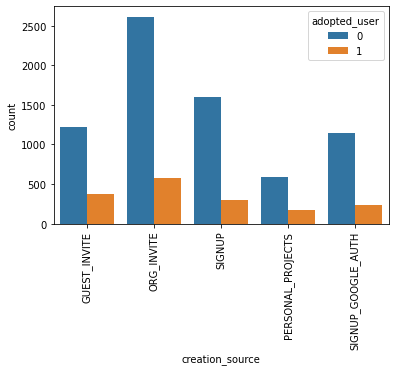

In [44]:
# Creation source and adopted user
_ = sns.countplot(x='creation_source', data=data, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [46]:
df2 = pd.get_dummies(data['creation_source'], drop_first = True)
df3 = pd.concat([data, df2], axis=1).drop('creation_source', axis=1)
df3.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age,adopted_user,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,,,
1,1,0,11,10803.0,0,38,0,0,0,0,0
2,0,0,1,316.0,136,196,1,1,0,0,0
3,0,0,94,1525.0,0,437,0,1,0,0,0
4,0,0,1,5151.0,1,374,0,0,0,0,0
5,0,0,193,5240.0,5,498,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
X = df3.drop('adopted_user', axis =1)
y = df3.adopted_user

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

params = {'n_estimators': [10, 50, 100, 200]}

model = GridSearchCV(rf, params)
model.fit(X_train, y_train)
model.best_score_

0.9630209222157753

In [57]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9631728045325779

In [61]:
print(model.feature_importances_)
print(X.columns)

[0.00388782 0.00338297 0.04313405 0.02469835 0.85256959 0.06197931
 0.00335047 0.00179671 0.00256068 0.00264005]
Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'history', 'account_age', 'ORG_INVITE',
       'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH'],
      dtype='object')


It is clear that the user history is the most important feature. Based on this, I recommend that an effective way of growing adopted users might be encouraging existing users to log in and use the software after they had accounts for a while.
The next important feature is how user signed up (if you add the importances of the four signup features above). Among the ways they sign up, guest inviation and personal projects are the two categories with highest user adoption rate. Encouraging users to invite others, and offering incentives for people to work on their personal projects using the software might be somewhat effective.
Account age has some importance, but there is nothing can be done to change that.
